In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [2]:
cancer = load_breast_cancer()

# 6. Отбор значимых признаков (PCA) и классификация

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# разбиваем выборку на тренировочный и тестовый наборы 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                         stratify = cancer.target, random_state = 0)

# масштабируем данные, чтобы они имели var = 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

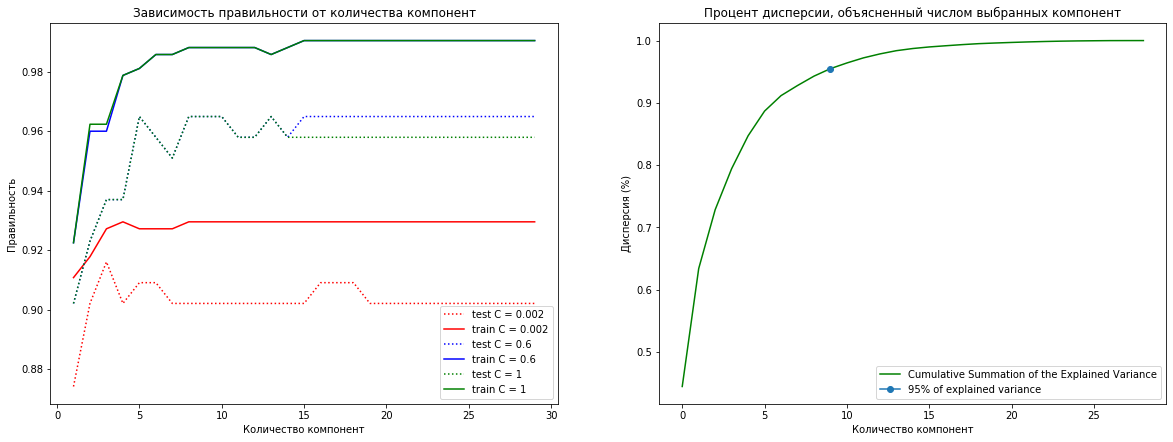

In [5]:
gridsize = (1,2)
fig = plt.figure(figsize=(20, 7))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))



components = np.arange(1,30,1)

for c, col in zip([0.002, 0.6, 1],['r','b','g']):
    train = []
    test = []
    for n_components in components:
        pca = PCA(n_components = n_components).fit(X_train_scaled)  
        X_train_pca = pca.transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
    
        log_reg = LogisticRegression(C = c)
        log_reg.fit(X_train_pca, y_train)
    
        train_score = log_reg.score(X_train_pca,y_train)
        train.append(train_score)
        test_score = log_reg.score(X_test_pca,y_test)
        test.append(test_score)
        
    ax1.plot(components,test, label = 'test C = {}'.format(c), linestyle='dotted', c = col)  
    ax1.plot(components,train, label = 'train C = {}'.format(c), c = col)
    ax1.set_xlabel('Количество компонент')
    ax1.set_ylabel('Правильность')
    ax1.legend(loc = 'best')
    ax1.set_title('Зависимость правильности от количества компонент')


point = np.argmin(np.abs(np.cumsum(pca.explained_variance_ratio_)-0.95))
ax2.plot(np.cumsum(pca.explained_variance_ratio_), label = 'Cumulative Summation of the Explained Variance', 
             c=col)
ax2.plot(components[point-1], np.cumsum(pca.explained_variance_ratio_)[point], 
             marker ='o',label = '95% of explained variance' )   
ax2.set_xlabel('Количество компонент')
ax2.set_ylabel('Дисперсия (%)') 
ax2.legend(loc = 'best')
ax2.set_title('Процент дисперсии, объясненный числом выбранных компонент')

plt.show()

In [6]:
# Теперь мы можем использовать новое представление, чтобы классифицировать данные
# используя классификатор LinearSVC
pca = PCA(n_components = 9).fit(X_train_scaled)  
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf = LinearSVC(random_state=0)
clf.fit(X_train_pca,y_train)

print("Правильность на обучающем наборе: {:.2f}".format(clf.score(X_train_pca, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test_pca, y_test)))

Правильность на обучающем наборе: 0.99
Правильность на тестовом наборе: 0.96


/Users/karinahanova/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca,y_train)
print("Правильность на обучающем наборе: {:.2f}".format(knn.score(X_train_pca, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test_pca, y_test)))

Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 0.95
